<a href="https://colab.research.google.com/github/husnulkhotimah-husnulkhotimah/Clustering/blob/main/Challenge_Clustering_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lakukan clustering menggunakan data berikut dan berikan insight apa yang didapat

Sumber : https://drive.google.com/file/d/173B2aaRtv9ekO-4suLD8h2zS7Lrkct_8/view?usp=drivesdk

Kelompok 4
1. Prima Nur
2. Andri Faisal Rahman
3. Salsabila Alya Saputri
4. Husnul Khotimah

## Data Preparation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('cluster_ojek_online.csv')

In [ ]:
df

,_id,tahun,bulan,mode,jarak,ongkir,belanja,total biaya,driver id,driver name,driver gender
0,1,2019,3,BIKE,"5,55",2500,0,2500,90,Rusman Situmorang,L
1,2,2019,3,FOOD,"7,08",9000,82000,91000,77,Lukman Ganep Januar M.Ak,L
2,3,2019,3,SHOP,"4,02",5000,58500,63500,75,Atma Dasa Uwais,L
3,4,2019,3,FOOD,"8,94",12000,72000,84000,82,Latif Marbun,L
4,5,2019,3,CAR,"7,93",14400,0,14400,109,Maimunah Pudjiastuti,P
...,...,...,...,...,...,...,...,...,...,...,...
745,746,2018,11,FOOD,"3,87",4000,59500,63500,89,Dirja Mansur,L
746,747,2018,11,BIKE,"4,79",2000,0,2000,78,Maryadi Natsir,L
747,748,2018,11,CAR,"11,56",22800,0,22800,96,Bakda Gunawan,L
748,749,2018,11,BIKE,"12,49",6500,0,6500,104,Faizah Shania Usamah S.T.,P


In [ ]:
df['jarak'] = df['jarak'].apply(lambda x: x.replace(',','.'))
df['jarak'] = df['jarak'].astype(float)

In [ ]:
df.isna().sum()

_id              0
tahun            0
bulan            0
mode             0
jarak            0
ongkir           0
belanja          0
total biaya      0
driver id        0
driver name      0
driver gender    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            750 non-null    int64  
 1   tahun          750 non-null    int64  
 2   bulan          750 non-null    int64  
 3   mode           750 non-null    object 
 4   jarak          750 non-null    float64
 5   ongkir         750 non-null    int64  
 6   belanja        750 non-null    int64  
 7   total biaya    750 non-null    int64  
 8   driver id      750 non-null    int64  
 9   driver name    750 non-null    object 
 10  driver gender  750 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 64.6+ KB


In [ ]:
df.columns

Index(['_id', 'tahun', 'bulan', 'mode', 'jarak', 'ongkir', 'belanja',
       'total biaya', 'driver id', 'driver name', 'driver gender'],
      dtype='object')

##K-Means untuk mencari efisiensi dari ongkir dan jarak  di mode bike

In [ ]:
df = df[~df['mode'].isin(['FOOD','CAR','SHOP'])]

NameError: ignored

In [ ]:
df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model_kmeans = KMeans(n_clusters=3)

In [ ]:
X = df[['jarak','ongkir']]

In [ ]:
X

In [ ]:
model_kmeans.fit(X)

In [ ]:
model_kmeans.labels_

In [ ]:
df['cluster'] = model_kmeans.labels_

In [ ]:
df

In [ ]:
from sklearn import metrics

print('Akurasi: ', metrics.silhouette_score(XA, model_kmeans.labels_))

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df['x'] = df.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df['y'] = df.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df['jarak'], df['ongkir'], c=df['c'])
plt.xlabel('Jarak')
plt.ylabel('Ongkir')
plt.show()

In [ ]:
df[df['cluster'] == 0 ]

In [ ]:
column_name = 'jarak'
avg_jarak_by_cluster0 = df[df['cluster'] == 0][column_name].mean()
print('jarak rata rata cluster 0 adalah', avg_jarak_by_cluster0, 'KM')

In [ ]:
column_name = 'ongkir'
avg_ongkir_by_cluster0 = df[df['cluster'] == 0][column_name].mean()
print('Ongkir rata rata cluster 0 adalah', avg_ongkir_by_cluster0, 'Rp')

In [ ]:
avg_ongkir_per_Km_cluster0 = avg_ongkir_by_cluster0/ avg_jarak_by_cluster0
print('biaya per Km cluster 0 adalah', avg_ongkir_per_Km_cluster0 , 'Rp/Km')

In [ ]:
df[df['cluster'] == 1]

In [ ]:
column_name = 'jarak'
avg_jarak_by_cluster1 = df[df['cluster'] == 1][column_name].mean()
print('jarak rata rata cluster 1 adalah', avg_jarak_by_cluster1, 'KM')

In [ ]:
column_name = 'ongkir'
avg_ongkir_by_cluster1 = df[df['cluster'] == 1][column_name].mean()
print('Ongkir rata rata cluster 1 adalah', avg_ongkir_by_cluster1, 'Rp')

In [ ]:
avg_ongkir_per_Km_cluster1 = avg_ongkir_by_cluster1/ avg_jarak_by_cluster1
print('biaya per Km cluster 1 adalah', avg_ongkir_per_Km_cluster1 , 'Rp/Km')

In [ ]:
df[df['cluster'] == 2]

In [ ]:
column_name = 'jarak'
avg_jarak_by_cluster2 = df[df['cluster'] == 2][column_name].mean()
print('jarak rata rata cluster 2 adalah', avg_jarak_by_cluster2, 'KM')

In [ ]:
column_name = 'ongkir'
avg_ongkir_by_cluster2 = df[df['cluster'] == 2][column_name].mean()
print('Ongkir rata rata cluster 2 adalah', avg_ongkir_by_cluster2, 'Rp')

In [ ]:
avg_ongkir_per_Km_cluster2 = avg_ongkir_by_cluster2/ avg_jarak_by_cluster2
print('biaya per Km cluster 2 adalah', avg_ongkir_per_Km_cluster2 , 'Rp/Km')

Kesimpulan :

    Cluster 0 adalah driver bike  yg memiliki
    rata rata jarak 5 KM
    rata rata ongkir 2238 Rp
    biaya per Km sebesar 440 Rp/Km
    
    Cluster 1 adalah driver bike yg memiliki
    rata rata jarak 12,7  KM
    rata rata ongkir 6486.4 Rp
    rata rata biaya per Km sebesar 508 Rp/Km
    
    Cluster 2 adalah driver bike yang memiliki
    rata rata jarak 8.57  KM
    rata rata ongkir 4162.79 Rp
    biaya per Km sebesar 485 Rp/Km

    sehingga kesimpulan paling efisien bagi konsumen adalah
    cluster 0 memiliki efisien biaya tertinggi sehingga dapat masuk nominasi driver paling efisien
    cluster 1 memiliki efisien biaya sedang perlu dipertahankan performancenya
    cluster 2 memiliki efisien biaya terendah perlu diberikan pelatihan.

Tes menggunakan elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## K-Means untuk mencari profit terbesar di Mode Food

In [ ]:
df_food = pd.DataFrame(df.loc[df['mode'] == 'FOOD'])
print(df_food)

     _id  tahun  bulan  mode  jarak  ongkir  belanja  total biaya  driver id  \
1      2   2019      3  FOOD   7.08    9000    82000        91000         77   
3      4   2019      3  FOOD   8.94   12000    72000        84000         82   
18    19   2019      3  FOOD   5.97    7000    71500        78500        101   
25    26   2019      3  FOOD   5.22    6000    69000        75000        103   
28    29   2019      3  FOOD   7.74   10000    49000        59000         85   
..   ...    ...    ...   ...    ...     ...      ...          ...        ...   
717  718   2018     11  FOOD   6.21    8000    99500       107500        105   
719  720   2018     11  FOOD   6.53    8000    68000        76000         85   
723  724   2018     11  FOOD  10.47   14000    38500        52500        103   
741  742   2018     11  FOOD   3.37    4000    33500        37500         81   
745  746   2018     11  FOOD   3.87    4000    59500        63500         89   

                  driver name driver ge

In [ ]:
X = df_food[['jarak', 'total biaya']]

In [ ]:
X

,jarak,total biaya
1,7.08,91000
3,8.94,84000
18,5.97,78500
25,5.22,75000
28,7.74,59000
...,...,...
717,6.21,107500
719,6.53,76000
723,10.47,52500
741,3.37,37500


In [ ]:
model_kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
model_kmeans.labels_

array([0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 1, 2, 2, 1], dtype=int32)

In [ ]:
df_food['cluster'] = model_kmeans.labels_

In [ ]:
df_food

,_id,tahun,bulan,mode,jarak,ongkir,belanja,total biaya,driver id,driver name,driver gender,cluster
1,2,2019,3,FOOD,7.08,9000,82000,91000,77,Lukman Ganep Januar M.Ak,L,0
3,4,2019,3,FOOD,8.94,12000,72000,84000,82,Latif Marbun,L,0
18,19,2019,3,FOOD,5.97,7000,71500,78500,101,Kartika Winarsih S.Ked,P,1
25,26,2019,3,FOOD,5.22,6000,69000,75000,103,Eka Tira Haryanti,P,1
28,29,2019,3,FOOD,7.74,10000,49000,59000,85,Jarwadi Nababan,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...
717,718,2018,11,FOOD,6.21,8000,99500,107500,105,Restu Yuniar S.Pt,P,0
719,720,2018,11,FOOD,6.53,8000,68000,76000,85,Jarwadi Nababan,L,1
723,724,2018,11,FOOD,10.47,14000,38500,52500,103,Eka Tira Haryanti,P,2
741,742,2018,11,FOOD,3.37,4000,33500,37500,81,Manah Sirait,L,2


In [ ]:
from sklearn import metrics

print('Akurasi: ', metrics.silhouette_score(X, model_kmeans.labels_))

Akurasi:  0.6024090063542143


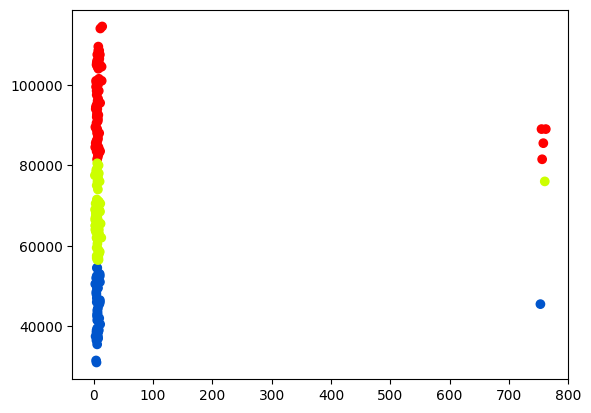

In [ ]:
import matplotlib.pyplot as plt

centroids = model_kmeans.cluster_centers_

x = [i[0] for i in centroids]
y = [i[1] for i in centroids]

df_food['x'] = df_food.cluster.map({0:x[0], 1:x[1], 2:x[2]})
df_food['y'] = df_food.cluster.map({0:y[0], 1:y[1], 2:y[2]})

colors = ['#ff0000', '#ccff00', '#0055cc']
df_food['c'] = df_food.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df_food['jarak'], df_food['total biaya'], c=df_food['c'])
plt.show()

In [ ]:
cluster_0 = pd.DataFrame(df_food[df_food['cluster'] == 0])
cluster_0

,_id,tahun,bulan,mode,jarak,ongkir,belanja,total biaya,driver id,driver name,driver gender,cluster,x,y,c
1,2,2019,3,FOOD,7.08,9000,82000,91000,77,Lukman Ganep Januar M.Ak,L,0,50.023143,94757.142857,#ff0000
3,4,2019,3,FOOD,8.94,12000,72000,84000,82,Latif Marbun,L,0,50.023143,94757.142857,#ff0000
34,35,2019,3,FOOD,4.75,6000,80000,86000,83,Gaiman Hidayat S.Kom,L,0,50.023143,94757.142857,#ff0000
47,48,2019,2,FOOD,4.16,5000,94500,99500,79,Jabal Prasetya S.Psi,L,0,50.023143,94757.142857,#ff0000
61,62,2019,2,FOOD,6.23,8000,86000,94000,75,Atma Dasa Uwais,L,0,50.023143,94757.142857,#ff0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,681,2018,11,FOOD,13.46,19000,85500,104500,81,Manah Sirait,L,0,50.023143,94757.142857,#ff0000
698,699,2018,11,FOOD,3.62,4000,90000,94000,90,Rusman Situmorang,L,0,50.023143,94757.142857,#ff0000
699,700,2018,11,FOOD,6.31,8000,78500,86500,103,Eka Tira Haryanti,P,0,50.023143,94757.142857,#ff0000
715,716,2018,11,FOOD,8.98,12000,71000,83000,78,Maryadi Natsir,L,0,50.023143,94757.142857,#ff0000


In [ ]:
cluster_0_mean_total_biaya = cluster_0['total biaya'].mean()
cluster_0_mean_jarak = cluster_0['jarak'].mean()
cluster_0['totalbiaya_per_Km'] = cluster_0['total biaya'] / cluster_0['jarak']
rata_total_biaya_per_Km = cluster_0['totalbiaya_per_Km'].mean()


print(cluster_0_mean_total_biaya)
print(cluster_0_mean_jarak)
print(rata_total_biaya_per_Km)

94757.14285714286
50.02314285714285
14052.183039600945


In [ ]:
cluster_1 = pd.DataFrame(df_food[df_food['cluster'] == 1])
cluster_1

,_id,tahun,bulan,mode,jarak,ongkir,belanja,total biaya,driver id,driver name,driver gender,cluster,x,y,c
18,19,2019,3,FOOD,5.97,7000,71500,78500,101,Kartika Winarsih S.Ked,P,1,17.914697,67212.121212,#ccff00
25,26,2019,3,FOOD,5.22,6000,69000,75000,103,Eka Tira Haryanti,P,1,17.914697,67212.121212,#ccff00
28,29,2019,3,FOOD,7.74,10000,49000,59000,85,Jarwadi Nababan,L,1,17.914697,67212.121212,#ccff00
37,38,2019,3,FOOD,6.58,8000,54000,62000,90,Rusman Situmorang,L,1,17.914697,67212.121212,#ccff00
42,43,2019,2,FOOD,10.84,15000,53500,68500,81,Manah Sirait,L,1,17.914697,67212.121212,#ccff00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,692,2018,11,FOOD,6.12,8000,72500,80500,77,Lukman Ganep Januar M.Ak,L,1,17.914697,67212.121212,#ccff00
703,704,2018,11,FOOD,3.69,4000,60500,64500,93,Mahesa Tarihoran S.Farm,L,1,17.914697,67212.121212,#ccff00
716,717,2018,11,FOOD,6.94,9000,57500,66500,82,Latif Marbun,L,1,17.914697,67212.121212,#ccff00
719,720,2018,11,FOOD,6.53,8000,68000,76000,85,Jarwadi Nababan,L,1,17.914697,67212.121212,#ccff00


In [ ]:
cluster_1_mean_total_biaya = cluster_1['total biaya'].mean()
cluster_1_mean_jarak = cluster_1['jarak'].mean()
cluster_1['totalbiaya_per_Km'] = cluster_1['total biaya'] / cluster_1['jarak']
rata_total_biaya_per_Km = cluster_1['totalbiaya_per_Km'].mean()


print(cluster_1_mean_total_biaya)
print(cluster_1_mean_jarak)
print(rata_total_biaya_per_Km)

67212.12121212122
17.914696969696966
12086.507581070773


In [ ]:
cluster_2 = pd.DataFrame(df_food[df_food['cluster'] == 2])
cluster_2

,_id,tahun,bulan,mode,jarak,ongkir,belanja,total biaya,driver id,driver name,driver gender,cluster,x,y,c
33,34,2019,3,FOOD,5.99,7000,28500,35500,76,Paiman Wacana S.Kom,L,2,21.5558,43650.0,#0055cc
43,44,2019,2,FOOD,6.27,8000,35000,43000,89,Dirja Mansur,L,2,21.5558,43650.0,#0055cc
45,46,2019,2,FOOD,10.59,14000,32500,46500,102,Intan Nasyiah,P,2,21.5558,43650.0,#0055cc
64,65,2019,2,FOOD,4.67,6000,42000,48000,101,Kartika Winarsih S.Ked,P,2,21.5558,43650.0,#0055cc
66,67,2019,2,FOOD,5.50,7000,47500,54500,76,Paiman Wacana S.Kom,L,2,21.5558,43650.0,#0055cc
74,75,2019,2,FOOD,9.64,13000,32500,45500,77,Lukman Ganep Januar M.Ak,L,2,21.5558,43650.0,#0055cc
89,90,2019,2,FOOD,2.82,3000,47500,50500,79,Jabal Prasetya S.Psi,L,2,21.5558,43650.0,#0055cc
120,121,2019,2,FOOD,4.77,6000,30500,36500,94,Harjo Karya Suwarno,L,2,21.5558,43650.0,#0055cc
130,131,2019,2,FOOD,4.18,5000,26500,31500,83,Gaiman Hidayat S.Kom,L,2,21.5558,43650.0,#0055cc
146,147,2019,1,FOOD,6.15,8000,31500,39500,91,Margana Pratama,L,2,21.5558,43650.0,#0055cc


In [ ]:
cluster_2_mean_total_biaya = cluster_2['total biaya'].mean()
cluster_2_mean_jarak = cluster_2['jarak'].mean()
cluster_2['totalbiaya_per_Km'] = cluster_2['total biaya'] / cluster_2['jarak']
rata_total_biaya_per_Km = cluster_2['totalbiaya_per_Km'].mean()


print(cluster_2_mean_total_biaya)
print(cluster_2_mean_jarak)
print(rata_total_biaya_per_Km)

43650.0
21.555799999999998
7015.945860030329


Kesimpulan Mode FOOD :

- Cluster 0 adalah driver yang memiliki total biaya tinggi dengan
  rata-rata total biaya = 94757.14285714286 Rp
  rata-rata jarak = 50.02314285714285 Km
  Total biaya/Jarak = 14052.183039600945 Rp/Km

- Cluster 1 adalah driver yang memiliki total biaya sedang dengan
 rata-rata total biaya = 67212.12121212122 Rp
 rata-rata jarak = 17.914696969696966 Km
 Total biaya/Jarak = 12086.507581070773 Rp/Km

- Cluster 2 adalah driver yang memiliki total biaya rendah dengan
 rata-rata total biaya = 43650.0 Rp
 rata-rata jarak = 21.555799999999998 Km
 Total biaya/Jarak = 7015.945860030329 Rp/Km

>>> Kesimpulan dari mode food adalah Cluster 0 paling besar nilai Total biaya/jarak dibandingkan cluster lain, karena dengan rata-rata jarak yang tinggi bisa mendapatkan rata-rata total biaya yang tinggi dibandingkan cluster lain,sehingga cluster 0 lebih profitable dibanding cluster yang lain


In [ ]:
# test elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 18615.929960800604
2 : 9782.628061423276
3 : 6244.764554211111
4 : 4501.229469752522
5 : 3732.1931194675144
6 : 3039.894687649174
7 : 2584.234486957294
8 : 2207.1091038728987
9 : 2026.0883497157943


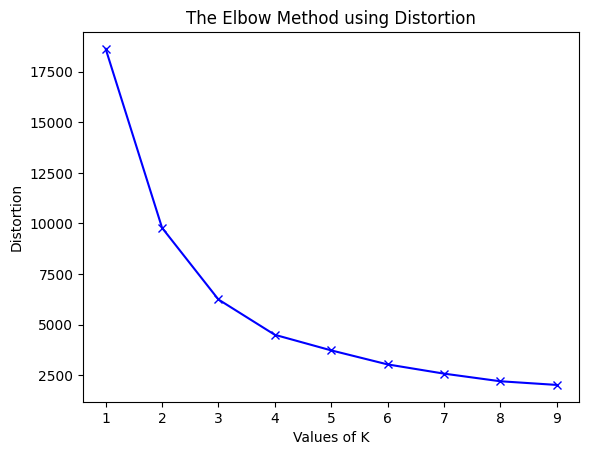

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()